# Introduction 

This project aims to explore the topic of climate change and show the corralations between CO2 levels polar ice and rainfall as the key variables, This research also seeks to investigate climate change signals within the context of Ireland's meteorological observations and harnesses data fusion techniques to amalgamate multiple datasets into a structured pandas dataframe.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import sys 
from sklearn.impute import SimpleImputer
import random
from plotly.offline import iplot
from plotnine import ggplot, aes, geom_line, geom_bar, geom_point, labs, coord_flip, theme_xkcd, geom_smooth
import json 
import warnings 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import scipy.fft
from scipy.fft import fft, fftfreq
from scipy.interpolate import interp1d


# Global warming 
The topic of global warming is more prevalant than ever. There are many factor that give rise to global warming, we will review some of these during these project along with their effects which can be seen world wide, the World is getting warmer. We are seen more storms and rising waters. All of which have been caused by human factors as we should discovery during this project. One of the biggest of these factors been fossil fuels which was one of the main focuses on the recent cop28 discussions held in Dubai. This is all part of the push to net zero. 

# what is net zero

Net zero means no longer adding to the total amount of greenhouse gases in the atmosphere. Greenhouse gases include carbon dioxide (CO2) and methane. CO2 is released when oil, gas and coal are burned in homes, factories and to power transport. Methane is produced through farming and landfill. Under the 2015 Paris climate agreement, 197 countries agreed to try to limit global temperature rises to 1.5C by 2100. To achieve this, CO2 emissions need to fall by nearly half by 2030 and reach net zero by 2050, according to the UN's climate body, the IPCC. But these emissions remain at record highs. In Ireland this forms part of the  Climate Action and Low Carbon Development Bill. Currently fossil fuels makes up 85% of Ireland's energy needs.

# CO2 

The average temperature at the Earth's surface has risen about 1.1C since 1850. Carbon dioxide is Earth’s most important greenhouse gas: a gas that absorbs and radiates heat. Unlike oxygen or nitrogen (which make up most of our atmosphere), greenhouse gases absorb heat radiating from the Earth’s surface and re-release it in all directions—including back toward Earth’s surface. Without carbon dioxide, Earth’s natural greenhouse effect would be too weak to keep the average global surface temperature above freezing. Carbon dioxide concentrations are rising mostly because of the fossil fuels that people are burning for energy. 





Changes in past atmospheric carbon dioxide concentrations can be determined by measuring the composition of air trapped in ice cores from Antarctica. So far, the Antarctic Vostok and EPICA Dome C ice cores have provided a composite record of atmospheric carbon dioxide levels over the past 650,000 years. Here we present results of the lowest 200 m of the Dome C ice core, extending the record of atmospheric carbon dioxide concentration by two complete glacial cycles to 800,000 yr before present. From previously published data and the present work, we find that atmospheric carbon dioxide is strongly correlated with Antarctic temperature throughout eight glacial cycles but with significantly lower concentrations between 650,000 and 750,000 yr before present.

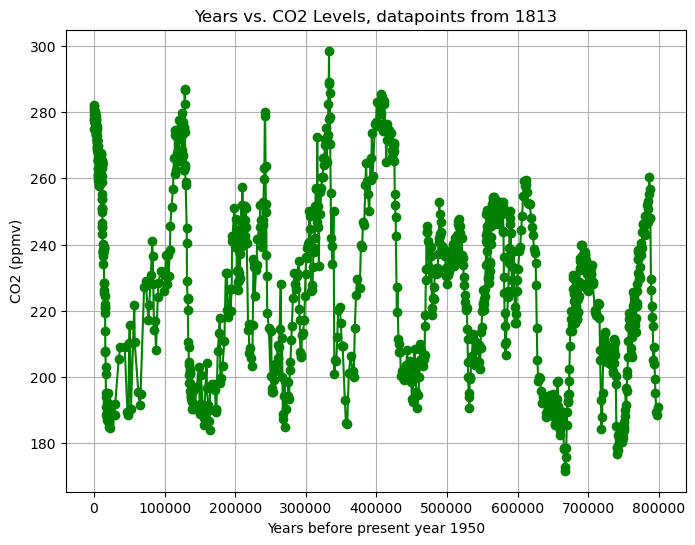

In [2]:

nature = pd.read_excel('data/C02 Nature Paper.xlsx', skiprows=6, sheet_name='3.  Composite CO2')

# Handling NaN values (if any)
nature.dropna(subset=['EDC3_gas_a (yr)', 'CO2 (ppmv)'], inplace=True)

# Extract data from the first two columns
years = nature['EDC3_gas_a (yr)']
co2 = nature['CO2 (ppmv)']

# Plotting the extracted data with the same formatting
plt.figure(figsize=(8, 6))
plt.plot(years, co2, marker='o', linestyle='-', color='green')
plt.xlabel('Years before present year 1950')
plt.ylabel('CO2 (ppmv)')
plt.title('Years vs. CO2 Levels, datapoints from 1813')
plt.grid(True)
plt.show()

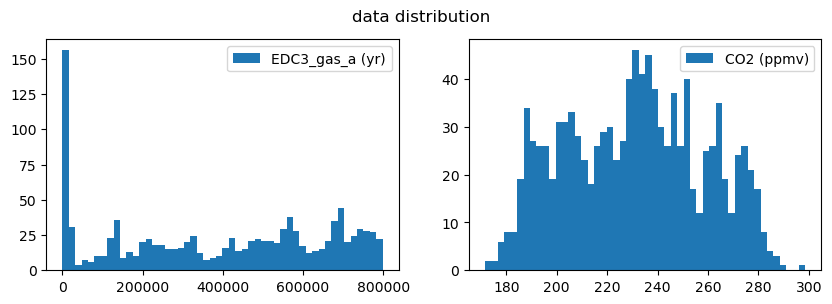

In [3]:
fig, axs = plt.subplots(1,2, figsize=(10,3)) # 1 row, 3 columns
# Age
axs[0].hist(nature['EDC3_gas_a (yr)'],label="EDC3_gas_a (yr)",bins=50)
axs[0].legend()
# Temperature
axs[1].hist(nature['CO2 (ppmv)'],label="CO2 (ppmv)", bins=50)
axs[1].legend()
plt.suptitle("data distribution")
plt.show()

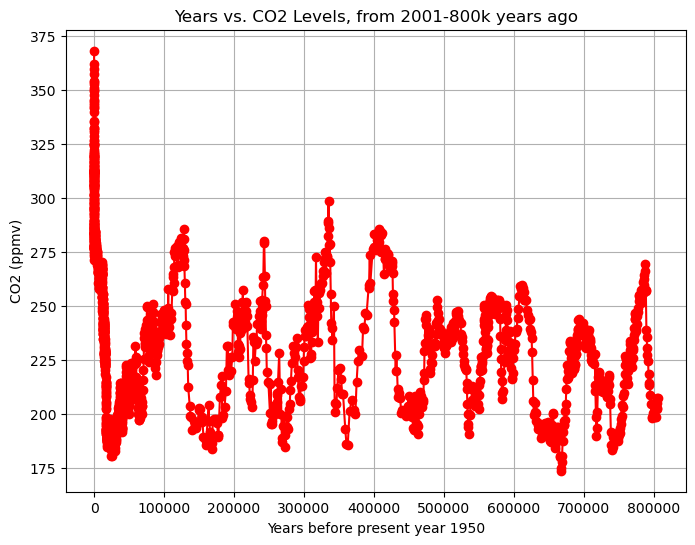

In [4]:

ipcc = pd.read_excel('data/C02 IPCC Report.xlsx',sheet_name= 'CO2 Composite',skiprows=range(14))

# Handling NaN values (if any)
ipcc.dropna(subset=['Gasage (yr BP) ', 'CO2 (ppmv)'], inplace=True)

# Extract data from the first two columns
Gasage = ipcc['Gasage (yr BP) ']
co22 = ipcc['CO2 (ppmv)']

# Plotting the extracted data with the same formatting
plt.figure(figsize=(8, 6))
plt.plot(Gasage, co22, marker='o', linestyle='-', color='red')
plt.xlabel('Years before present year 1950')
plt.ylabel('CO2 (ppmv)')
plt.title('Years vs. CO2 Levels, from 2001-800k years ago')
plt.grid(True)
plt.show()

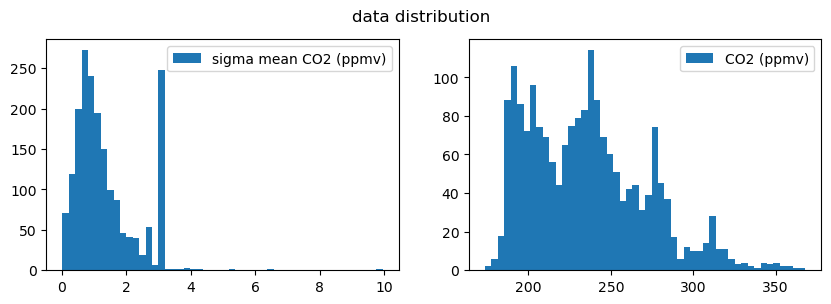

In [5]:
fig, axs = plt.subplots(1,2, figsize=(10,3)) # 1 row, 3 columns
axs[0].hist(ipcc['sigma mean CO2 (ppmv)'],label="sigma mean CO2 (ppmv)",bins=50)
axs[0].legend()
axs[1].hist(ipcc['CO2 (ppmv)'],label="CO2 (ppmv)", bins=50)
axs[1].legend()
plt.suptitle("data distribution")
plt.show()

# Mauna Loa Data set
The Mauna Loa data has the the latest anthropogenic data. Since 1958, the atmospheric carbon dioxide (CO2) concentration measurements were collected at the Mauna Loa Observatory in Hawaii. The observatory is in prime location to sample the Earths air. It is situated on the side of Mauna Loa, the world’s largest active volcano. The observatory is approximately 3,400 meters above sea level and remains a long distance away from significant pollution sources. This means the air is relatively clean. The Mauna Loa Observatory allows scientists to understand the ongoing increase in greenhouse gas concentrations. The measurements are essential for assessing the impact of human-induced climate change on the Earth's atmosphere. National Oceanic and Atmospheric Administration (NOAA) maintained the dataset.

In [6]:
mlo = pd.read_csv('data/loa.csv',skiprows=range(43))

In [7]:
mlo.columns = mlo.columns.str.lstrip()
mlo.columns = mlo.columns.str.rstrip()

In [8]:
base = 1950
mlo['year'] = base - mlo['year']

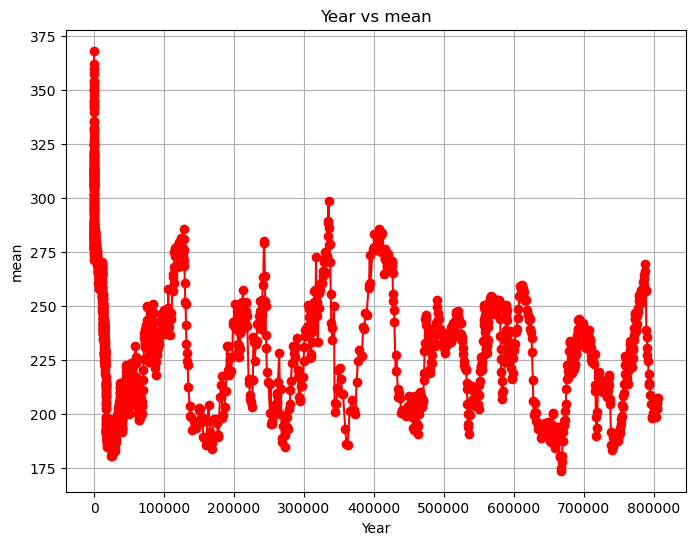

In [9]:

# Extract data from the first two columns
year = mlo['year']
mean = mlo['mean']

# Plotting the extracted data with the same formatting
plt.figure(figsize=(8, 6))
plt.plot(Gasage, co22, marker='o', linestyle='-', color='red')
plt.xlabel('Year')
plt.ylabel('mean')
plt.title('Year vs mean')
plt.grid(True)
plt.show()

In [10]:
mlo = mlo.rename(columns=(({'year':'EDC3_gas_a (yr)'})))
mlo = mlo.rename(columns=(({'mean':'CO2 (ppmv)'})))

In [11]:
mlo.columns = mlo.columns.str.lstrip()
mlo.columns = mlo.columns.str.rstrip()

In [12]:
mergeddf = pd.concat([mlo, nature])
mergeddf = mergeddf.drop(['unc'],axis =1)

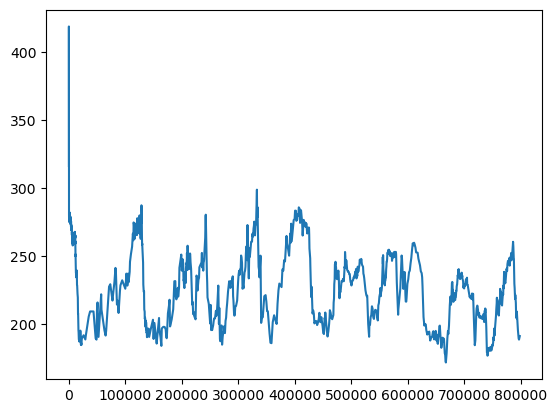

In [13]:
plt.plot(mergeddf['EDC3_gas_a (yr)'],mergeddf['CO2 (ppmv)'])
plt.show()

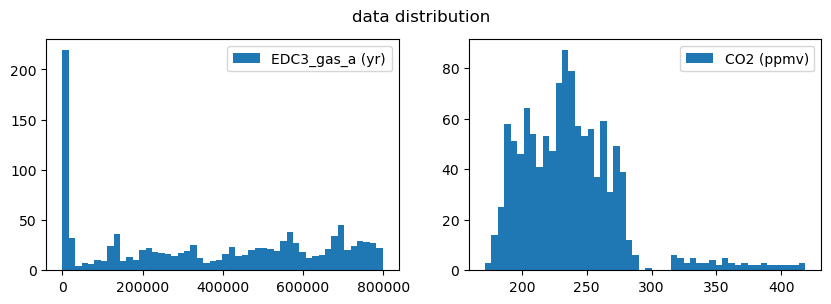

In [14]:
fig, axs = plt.subplots(1,2, figsize=(10,3)) # 1 row, 3 columns
axs[0].hist(mergeddf['EDC3_gas_a (yr)'],label="EDC3_gas_a (yr)",bins=50)
axs[0].legend()
axs[1].hist(mergeddf['CO2 (ppmv)'],label="CO2 (ppmv)", bins=50)
axs[1].legend()
plt.suptitle("data distribution")
plt.show()

# Temperature
according to wikipedia, Temperature is a physical quantity that quantitatively expresses the attribute of heat or cold. Temperature is measured with a thermometer. It reflects the kinetic energy of the vibrating and colliding atoms making up a substance. There are several scales used to measure temperature, these include Kelvin, Celsius, Fahrenheit, Absolute zero is 0 K on the Kelvin scale, −273.15 C on the Celsius scale, and −459.67 F on the Fahrenheit scale. The average temperature of the earths surface has had a gradual increase of 1.1c since the year 1850. To add to this the last four decades have been warmer than previous decades. Much research has been done into why temperature is rising there have been some generel conclolusion is that the industral age has caused this spike.

# EPICA Dome C Ice Core 800KYr Deuterium Data and Temperature Estimates

This dataset shows the r Ice Coring in Antarctica Dome C ice core, extending this climate record back to marine isotope stage 20.2, ~800,000 years ago. And originates from research Experiments performed with an atmospheric general circulation model including water isotopes support its temperature interpretation. And concludes that  the presence of such features with similar amplitudes during previous glacial periods. And suggests that the interplay between obliquity and precession accounts for the variable intensity of interglacial periods in ice core records.

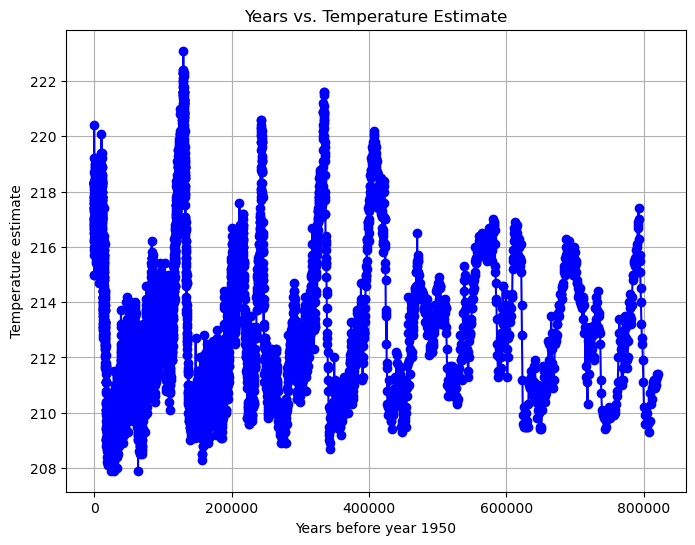

In [15]:
jouzel = pd.read_csv('data/jouzel.csv',encoding='Latin')

# Extracting columns 3 (EDC3 age scale) and 5 (Temperature estimate)
edc3_age = jouzel['EDC3béta']
temperature_estimate = jouzel['temp']

# Plotting the data
plt.figure(figsize=(8, 6))
plt.plot(edc3_age, temperature_estimate, marker='o', linestyle='-', color='blue')
plt.xlabel('Years before year 1950')
plt.ylabel('Temperature estimate')
plt.title('Years vs. Temperature Estimate')
plt.grid(True)
plt.show()

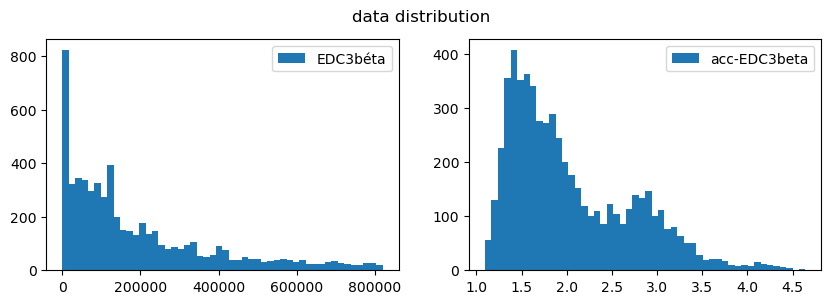

In [16]:
fig, axs = plt.subplots(1,2, figsize=(10,3)) # 1 row, 3 columns
axs[0].hist(jouzel['EDC3béta'],label="EDC3béta",bins=50)
axs[0].legend()

axs[1].hist(jouzel['acc-EDC3beta'],label="acc-EDC3beta", bins=50)
axs[1].legend()
plt.suptitle("data distribution")
plt.show()

In [17]:
jouzel =pd.read_csv('data/jouzel.csv',encoding='Latin')

jouzel['difference'] = jouzel['temp'] - 218.32
jouzel

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta,difference
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321,-0.02
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805,-0.02
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404,-0.02
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025,-0.02
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453,-0.02
...,...,...,...,...,...,...,...,...
5814,5815,3197.70,816871.60000,817562.000000,-432.2,211.0,1.529000,-7.32
5815,5816,3198.25,817693.60000,818631.000000,-431.4,211.2,1.548000,-7.12
5816,5817,3198.80,818505.50000,819700.000000,-430.3,211.3,1.576000,-7.02
5817,5818,3199.35,819303.10000,820769.000000,-429.8,211.4,1.589000,-6.92


In [18]:
jouzel['celsius'] = jouzel['temp'] - 273.15

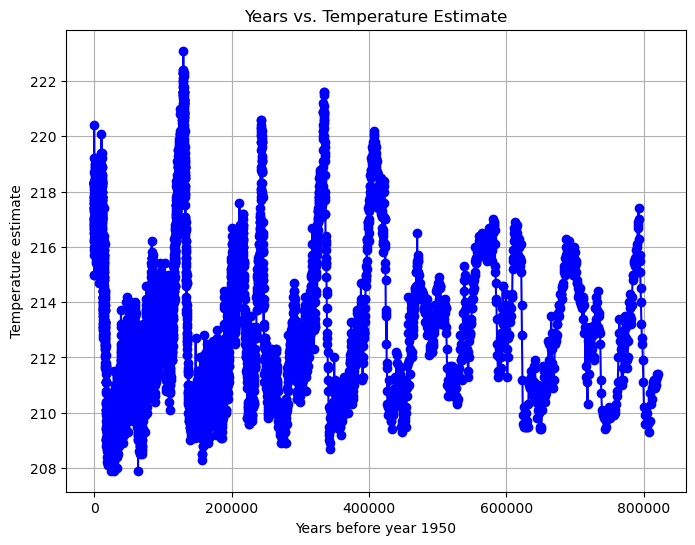

In [19]:
edc3_age = jouzel['EDC3béta']
temperature_estimate = jouzel['temp']

# Plotting the data
plt.figure(figsize=(8, 6))
plt.plot(edc3_age, temperature_estimate, marker='o', linestyle='-', color='blue')
plt.xlabel('Years before year 1950')
plt.ylabel('Temperature estimate')
plt.title('Years vs. Temperature Estimate')
plt.grid(True)
plt.show()

In [20]:
noaa =pd.read_csv('data/Temp data NOAA.csv',skiprows=range(91),delimiter=r"\s+")
noaa2 = noaa.dropna()

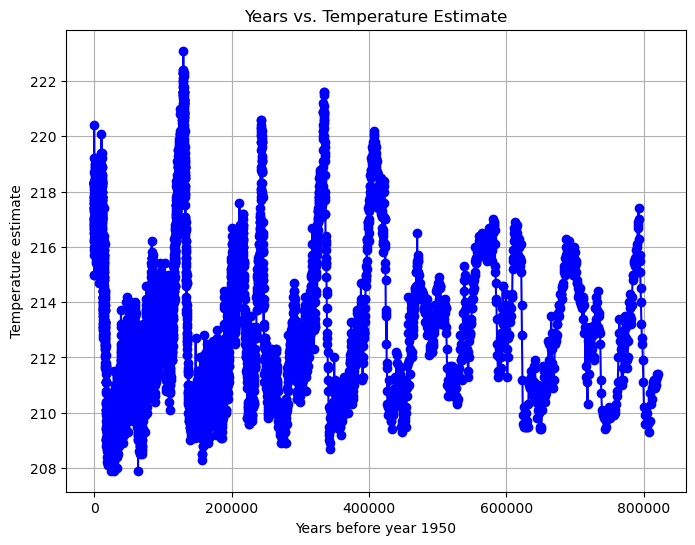

In [21]:
Deuterium = noaa['Deuterium']
Temperature = noaa['Temperature']

# Plotting the data
plt.figure(figsize=(8, 6))
plt.plot(edc3_age, temperature_estimate, marker='o', linestyle='-', color='blue')
plt.xlabel('Years before year 1950')
plt.ylabel('Temperature estimate')
plt.title('Years vs. Temperature Estimate')
plt.grid(True)
plt.show()

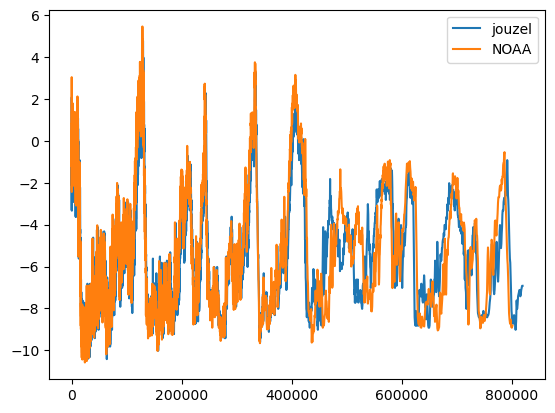

In [22]:
plt.plot(jouzel['EDC3béta'],jouzel['difference'], label = 'jouzel')
plt.plot(noaa['Age'],noaa['Temperature'], label = 'NOAA')
plt.legend()
plt.show()

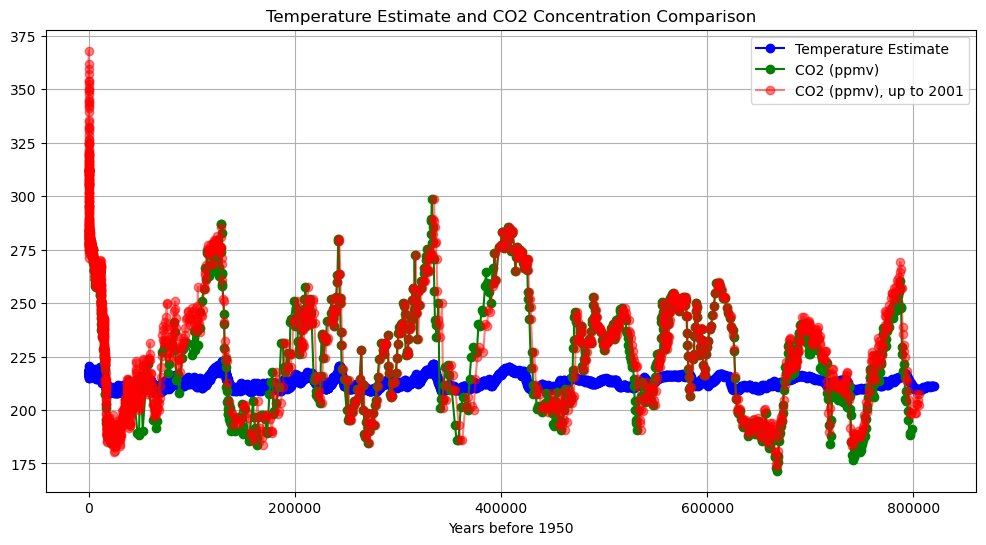

In [23]:
plt.figure(figsize=(12, 6))

# Plotting the first dataset
plt.plot(edc3_age, temperature_estimate, marker='o', linestyle='-', color='blue', label='Temperature Estimate')

# Plotting the second dataset
plt.plot(years, co2, marker='o', linestyle='-', color='green', label='CO2 (ppmv)')

# Plotting the third dataset
plt.plot(Gasage, co22, marker='o', linestyle='-', color='red', label='CO2 (ppmv), up to 2001', alpha=0.5)

plt.xlabel('Years before 1950')
plt.grid(True)
plt.legend()
plt.title('Temperature Estimate and CO2 Concentration Comparison')
plt.show()

# polar ice

Polar Ice. form part of the debate on climate change, Polar ice arises when sea water freezes, polar Ice covers 7% of the earths surface and it also covers 12% of the worlds oceans and according to According to the National Snow Ice and Data Center (NSIDC), sea ice covers just over 9.6 million square miles of the Earth. That's about 2.5 times the size of Canada!. Polar ice helps to regulate heat. It insulates the relatively warm ocean water from the cold polar atmosphere except where cracks, or leads, in the ice allow exchange of heat and water vapor from ocean to atmosphere in winter. The number of leads determines where and how much heat and water are lost to the atmosphere, which may affect local cloud cover and precipitation. As sea ice extent shrinks and breaks up, exposed ocean waters increase.

In 1979, satellites started monitoring sea ice, to keep an eye on how much of it there was. This has raised alarm NSIDC reported that in January 2017, there was about 5.17 million square miles of Arctic sea ice recorded. This was the lowest recorded amount since 1979. In fact, it's 100,000 square miles less Arctic sea ice than there was in January 2016.

This means that as this ice begins to melt and disapper water levels will begin to rise and this gives rise to flooding. Warmer temperatures in the Arctic and the Antarctic can also affect how the world's atmosphere behaves, as air moves around the Earth. There is one other factor at play here the question of wildlife, Polar bears seals penguins all need this ice to live. if it disappers and reduces year and year. they are also at risk. 



In [24]:
seaice = pd.read_csv('data/deboer2014.txt', delimiter='\t', na_values=-999, skiprows=114)

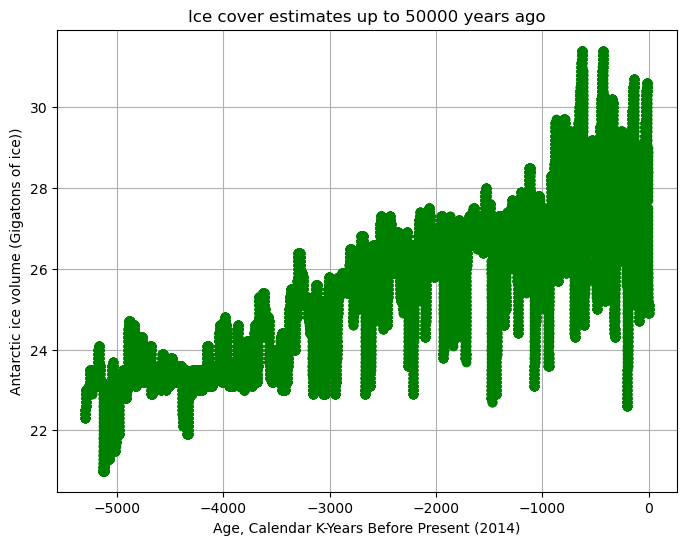

In [25]:
year = seaice['age_calkaBP']
ice_volume = seaice['AnIS-V']

# Plotting the extracted data
plt.figure(figsize=(8, 6))
plt.plot(year, ice_volume,  marker='o', color='green')
plt.xlabel('Age, Calendar K-Years Before Present (2014)')  
plt.ylabel('Antarctic ice volume (Gigatons of ice))')  
plt.title('Ice cover estimates up to 50000 years ago')
plt.grid(True)
plt.show()

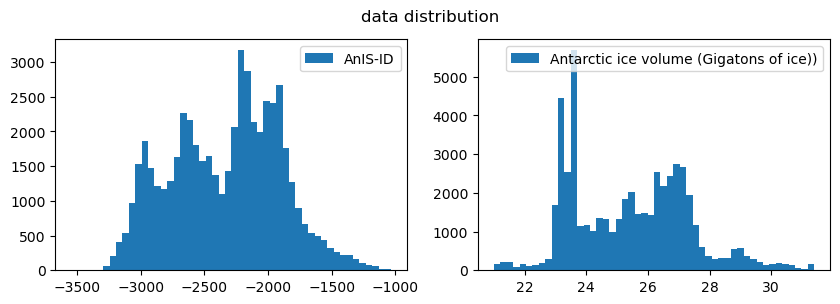

In [26]:
fig, axs = plt.subplots(1,2, figsize=(10,3)) # 1 row, 3 columns
axs[0].hist(seaice['AnIS-ID'],label="AnIS-ID",bins=50)
axs[0].legend()
axs[1].hist(seaice['AnIS-V'],label="Antarctic ice volume (Gigatons of ice))", bins=50)
axs[1].legend()
plt.suptitle("data distribution")
plt.show()

# rainfall in Ireland 

wikipedia states 'Rainfall is the most common form of precipitation on the island, and is extremely common throughout Ireland, although some parts of the west coast receive twice as much rain as the east coast. Rainfall in Ireland normally comes from Atlantic frontal systems which travel northeast over the island, bringing cloud and rain. Most of the eastern half of the country has between 750 and 1,000 mm (29.5 and 39.4 in) of rainfall in the year' There is many datasets available on Irish rainfall, The dataset I will be using here is from from 1711 - 2016 gathered from MET Éireann and was comprised in an article that was part of a study from Maynooth University. 

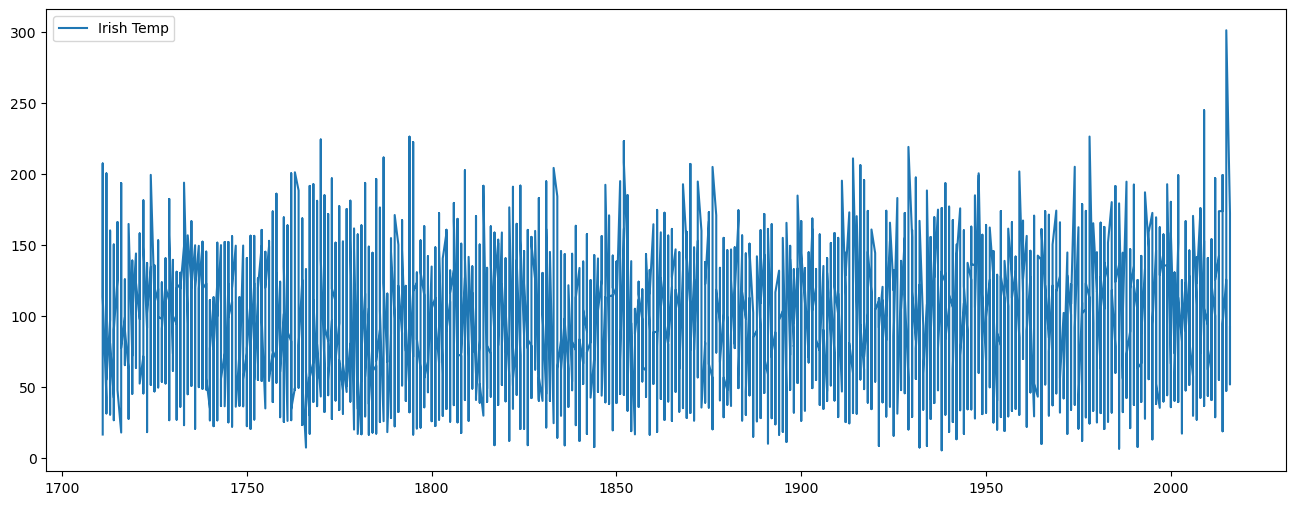

In [27]:
Irish_rainfall = pd.read_csv('data/Rainfall.CSV')
plt.figure(figsize=(16, 6))


plt.plot(Irish_rainfall['Year'],Irish_rainfall['Median montly series'], label = 'Irish Temp')
plt.legend()
plt.show()

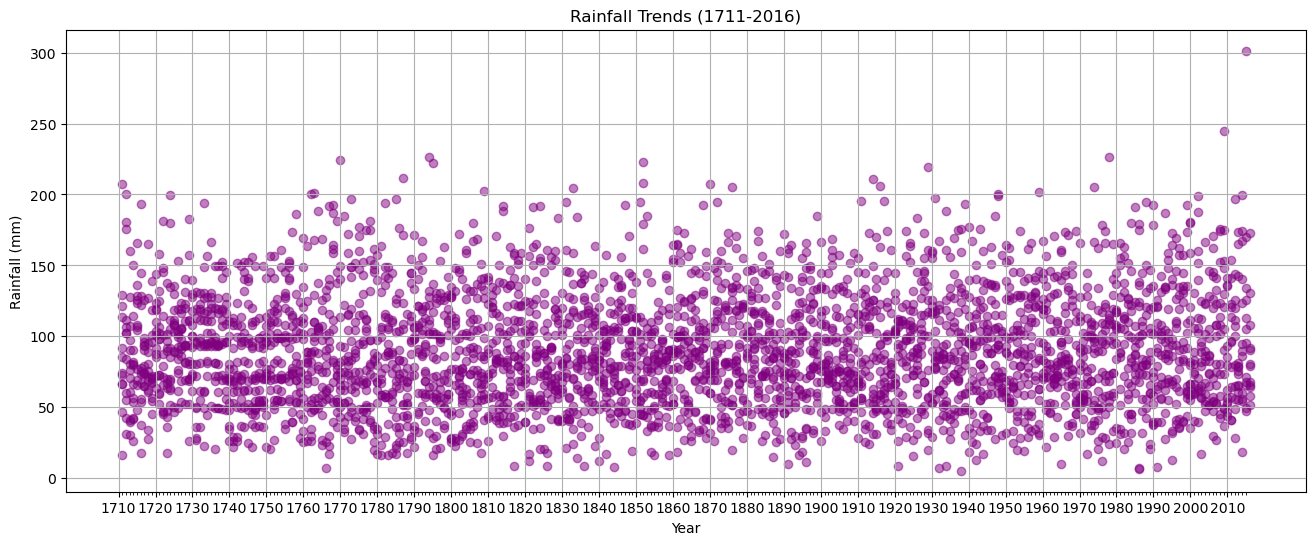

In [28]:
plt.figure(figsize=(16, 6))
ax = plt.gca()

# Plotting the data as individual points
plt.scatter(Irish_rainfall['Year'], Irish_rainfall['Median montly series'], color='purple', alpha=0.5)

# Set x-axis major ticks every 10 years
major_ticks = range(1710, 2017, 10)
ax.set_xticks(major_ticks)

# Set minor ticks between major ticks
minor_ticks = range(1711, 2016, 1)
ax.set_xticks(minor_ticks, minor=True)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Trends (1711-2016)')

# Show grid and plot
plt.grid(True)
plt.show()

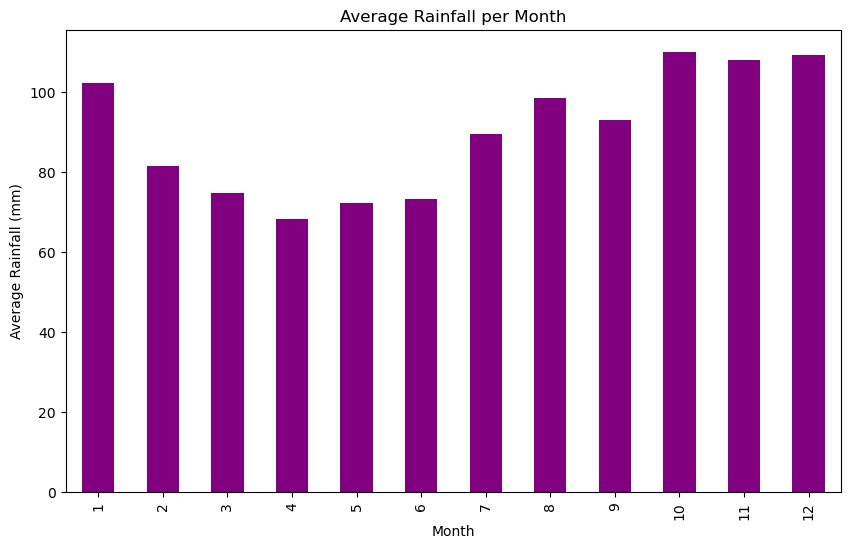

In [29]:
rainfall = Irish_rainfall.groupby('Month')['Median montly series'].mean()

plt.figure(figsize=(10, 6))
rainfall.plot(kind='bar', color='purple')
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')
plt.title('Average Rainfall per Month')
plt.show()

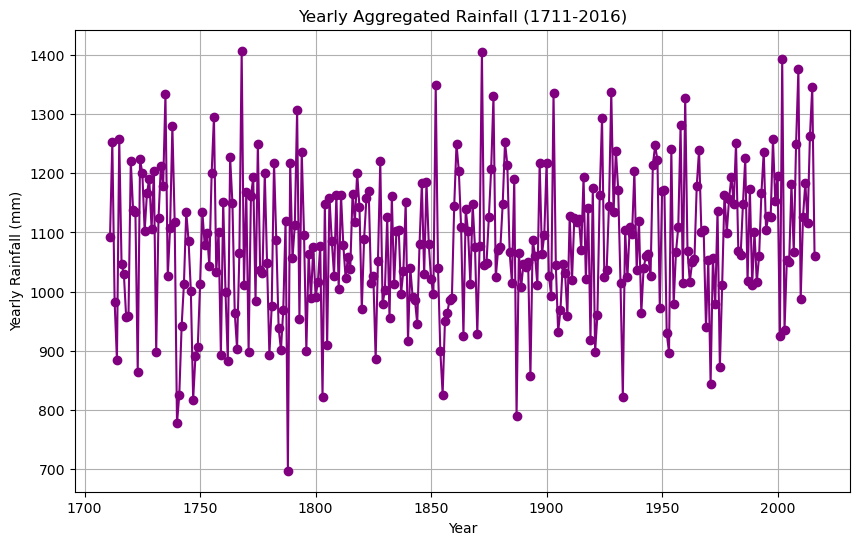

In [30]:
Irish_rainfall['Date'] = pd.to_datetime(Irish_rainfall[['Year', 'Month']].assign(day=1))


yearly_rainfall = Irish_rainfall.groupby(Irish_rainfall['Date'].dt.year)['Median montly series'].sum()


plt.figure(figsize=(10, 6))
plt.plot(yearly_rainfall.index, yearly_rainfall.values, marker='o', linestyle='-', color='purple')
plt.xlabel('Year')
plt.ylabel('Yearly Rainfall (mm)')
plt.title('Yearly Aggregated Rainfall (1711-2016)')
plt.grid(True)
plt.show()

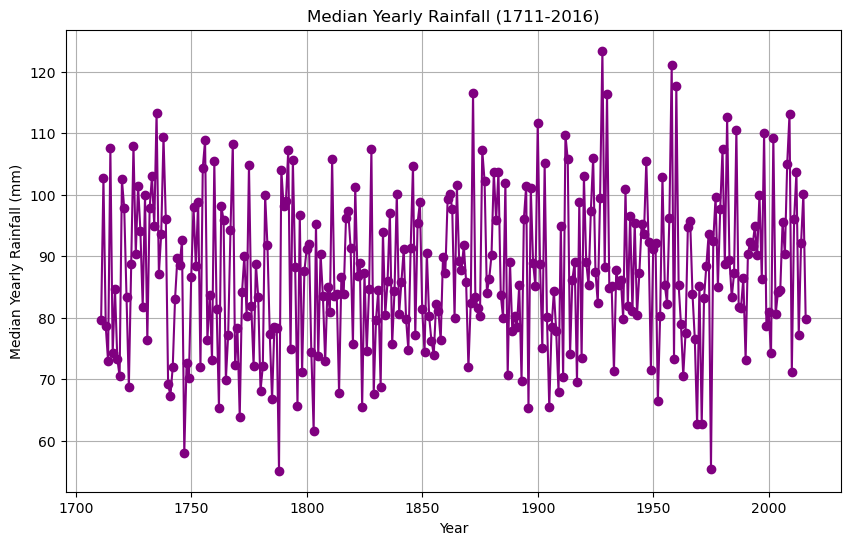

In [31]:
Irish_rainfall['Date'] = pd.to_datetime(Irish_rainfall[['Year', 'Month']].assign(day=1))

# Calculate median yearly rainfall
yearly_median_rainfall = Irish_rainfall.groupby(Irish_rainfall['Date'].dt.year)['Median montly series'].median()

# Plot the median yearly rainfall data
plt.figure(figsize=(10, 6))
plt.plot(yearly_median_rainfall.index, yearly_median_rainfall.values, marker='o',  color='purple')
plt.xlabel('Year')
plt.ylabel('Median Yearly Rainfall (mm)')
plt.title('Median Yearly Rainfall (1711-2016)')
plt.grid(True)
plt.show()

In [32]:
irish_temp = pd.read_csv('data/IrelandMean.csv')

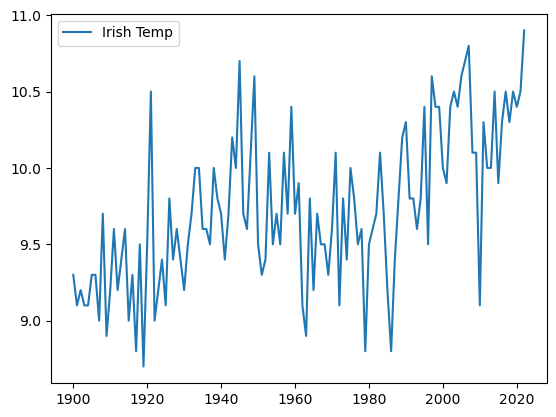

In [33]:
plt.plot(irish_temp['year'],irish_temp['Annual'], label = 'Irish Temp')
plt.legend()
plt.show()

# methane 
more commonly referred to CH4 is a colourless and odourless gas that occurs abundantly in nature and as a product of certain human activities. methane is mostly produced by bogs and cows releasing it in to the athmosphire. However but it's by far mostly human activity that's driving up levels of this destructive greenhouse gas.  methane is a potent greenhouse gas—about 28 times more powerful than carbon dioxide at warming the Earth, on a 100-year timescale, and more than 80 times more powerful over 20 years. The effects aren’t just hypothetical: Since the Industrial Revolution, methane concentrations in the atmosphere have more than doubled, and about 20 percent of the warming the planet has experienced can be attributed to the gas. This would link back into the earlier section on tempature change when discussing tempature change we also seen that this rise was linked to the industral recvolution. 

In terms of the Irish context been a massivly argiculrtle area, teagasc states "The reporting of Irish GHG emissions in 2020 attributes 58% of Irish agri emissions to methane produced by the rumen of cattle and sheep. A further 10% of national agricultural emissions originated from methane associated with the storage of manure and slurry. This is produced by microbes that have passed through the animal in the faeces. Methane associated with ruminant livestock production accounts for two-thirds (68%) of Irish agricultural GHG emissions"



In [34]:
methane =pd.read_csv('data/methane_data.csv',encoding='Latin')

In [35]:
methane_noaa = pd.read_csv('data/Methane NOAA.csv',encoding='Latin',delimiter=r"\s+")

In [36]:
methane_noaa.columns = methane_noaa.columns.str.lstrip()
methane_noaa.columns = methane_noaa.columns.str.rstrip()

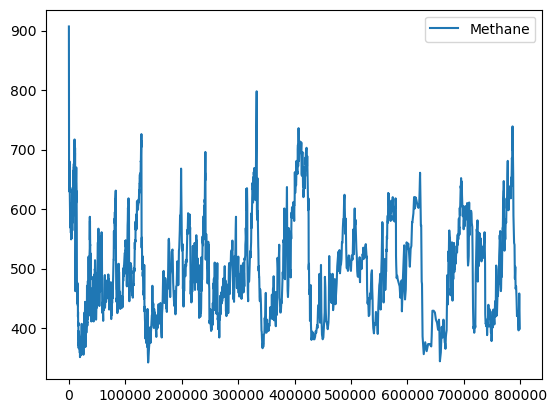

In [37]:
plt.plot(methane['gas age (edc3_gas_a)'],methane['CH4 mean'], label = 'Methane')

plt.legend()
plt.show()

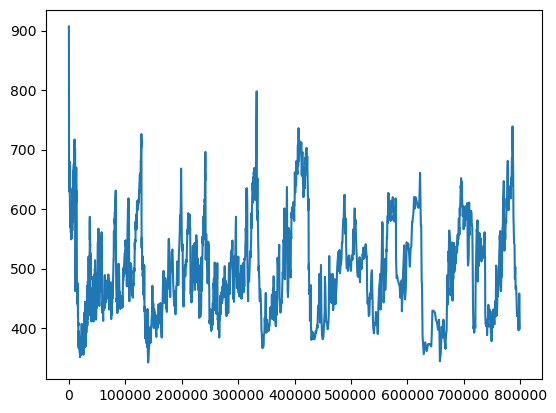

In [38]:
plt.plot(methane_noaa['Age'],methane_noaa['CH4_mean'], label = 'Methane2')

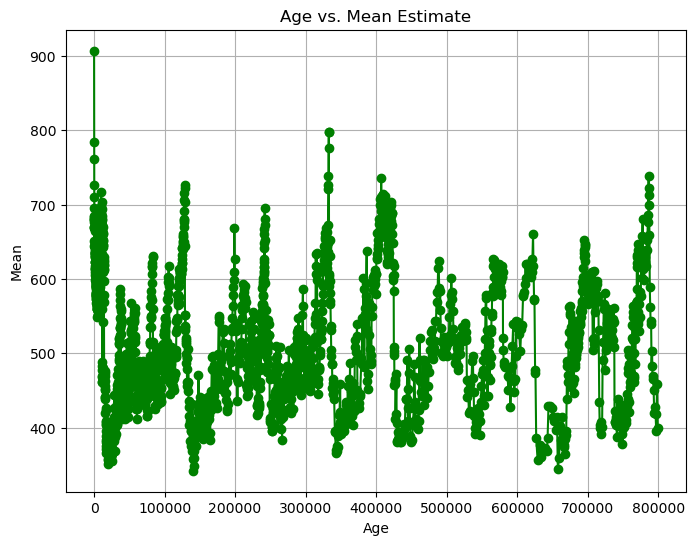

In [39]:
Age = methane_noaa['Age']
CH4_mean = methane_noaa['CH4_mean']

# Plotting the data
plt.figure(figsize=(8, 6))
plt.plot(Age, CH4_mean, marker='o', linestyle='-', color='green')
plt.xlabel('Age')
plt.ylabel('Mean')
plt.title('Age vs. Mean Estimate')
plt.grid(True)
plt.show()

In [40]:
result=pd.concat([nature,ipcc,noaa,jouzel,mlo],axis =1)
print(result)

      EDC3_gas_a (yr)  CO2 (ppmv)  Gasage (yr BP)   CO2 (ppmv)  \
0               137.0       280.4       -51.030000  368.022488   
1               268.0       274.9       -48.000000  361.780737   
2               279.0       277.9       -46.279272  359.647793   
3               395.0       279.1       -44.405642  357.106740   
4               404.0       281.9       -43.080000  353.946685   
...               ...         ...              ...         ...   
5814              NaN         NaN              NaN         NaN   
5815              NaN         NaN              NaN         NaN   
5816              NaN         NaN              NaN         NaN   
5817              NaN         NaN              NaN         NaN   
5818              NaN         NaN              NaN         NaN   

      sigma mean CO2 (ppmv)  Bag  ztop       Age  Deuterium  Temperature  ...  \
0                  0.060442  1.0  0.00 -50.00000        NaN          NaN  ...   
1                  0.370000  2.0  0.55 -43.54

In [41]:
json_str = result.to_csv()
with open('newdf.json', 'w') as f:
    json.dump(json_str, f)


In [42]:
merged1 = pd.concat([methane])
merged1['blank1'] = 'SPACE'

In [43]:
merged2 = pd.concat([nature,merged1,ipcc,merged1,mlo,merged1,noaa,merged1,jouzel,merged1,Irish_rainfall,merged1,yearly_median_rainfall,merged1,irish_temp,merged1,methane_noaa],axis =1)

In [44]:
merged2

,EDC3_gas_a (yr),CO2 (ppmv),EDC1999 depth,gas age (edc3_gas_a),CH4 mean,1 s uncertainty,"Bern, Grenoble",blank1,Gasage (yr BP),CO2 (ppmv),...,gas age (edc3_gas_a),CH4 mean,1 s uncertainty,"Bern, Grenoble",blank1,ï»¿Depth,Age,CH4_mean,1s,Lab.
0,137.0,280.4,99.34,13.0,907.0,10.0,b,SPACE,-51.030000,368.022488,...,13.0,907.0,10.0,b,SPACE,99.34,13.0,907.0,10.0,b
1,268.0,274.9,102.45,126.0,784.0,10.0,g,SPACE,-48.000000,361.780737,...,126.0,784.0,10.0,g,SPACE,102.45,126.0,784.0,10.0,g
2,279.0,277.9,102.58,130.0,762.0,10.0,b,SPACE,-46.279272,359.647793,...,130.0,762.0,10.0,b,SPACE,102.58,130.0,762.0,10.0,b
3,395.0,279.1,103.34,151.0,710.0,10.0,g,SPACE,-44.405642,357.106740,...,151.0,710.0,10.0,g,SPACE,103.34,151.0,710.0,10.0,g
4,404.0,281.9,104.33,184.0,727.0,10.0,g,SPACE,-43.080000,353.946685,...,184.0,727.0,10.0,g,SPACE,104.33,184.0,727.0,10.0,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
merged2=merged1.dropna()

In [46]:

df1 = pd.read_csv('combined_temp.csv')
df1.head()

,EDC1999 depth,gas age (edc3_gas_a),CH4 mean,1 s uncertainty,"Bern, Grenoble",blank1
0,99.34,13,907,10.0,b,SPACE
1,102.45,126,784,10.0,g,SPACE
2,102.58,130,762,10.0,b,SPACE
3,103.34,151,710,10.0,g,SPACE
4,104.33,184,727,10.0,g,SPACE


In [47]:
merged2.to_csv('combined_temp.csv', encoding='utf-8', index=False)

In [48]:
mergeddf.to_json('combined_temps.json',orient='records')

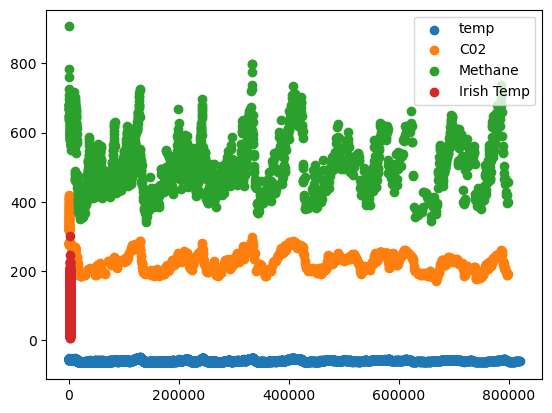

In [49]:
plt.scatter(jouzel['EDC3béta'],jouzel['celsius'], label = 'temp')
plt.scatter(mergeddf['EDC3_gas_a (yr)'],mergeddf['CO2 (ppmv)'], label = 'C02')
plt.scatter(methane['gas age (edc3_gas_a)'],methane['CH4 mean'], label = 'Methane')
plt.scatter(Irish_rainfall['Year'],Irish_rainfall['Median montly series'], label = 'Irish Temp')
plt.legend()
plt.show()

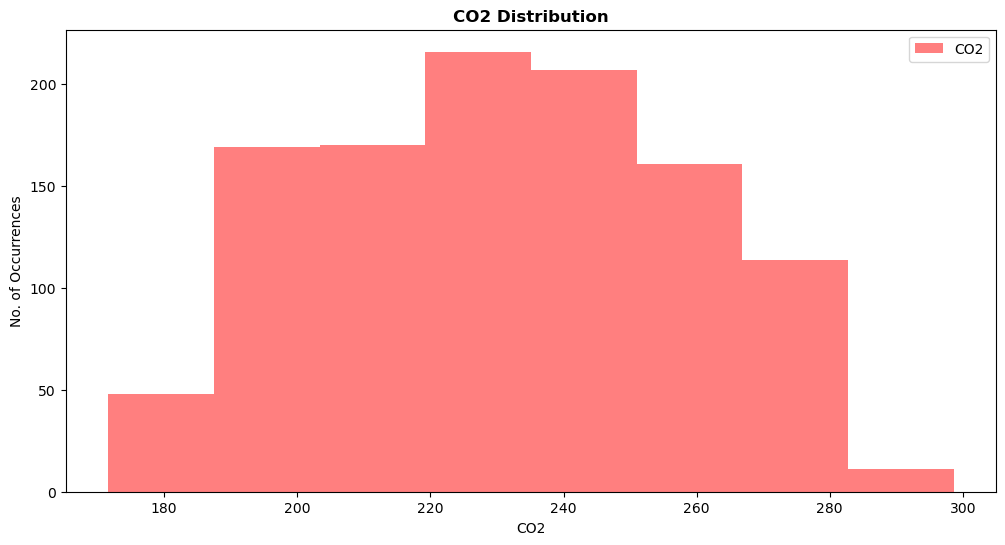

In [50]:
fig, ax = plt.subplots(figsize = (12,6))

ax.set_title("CO2 Distribution", fontweight='bold') 
ax.set(xlabel='CO2')    
ax.set(ylabel="No. of Occurrences") 
ax.hist(nature['CO2 (ppmv)'], bins=8, alpha=0.5, label="CO2", color='red')  
ax.legend(loc='upper right')

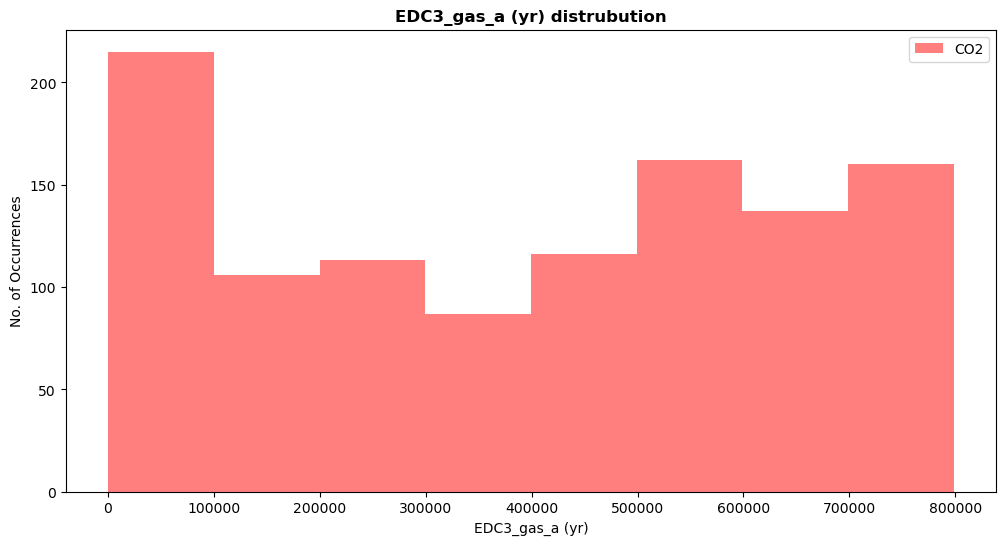

In [51]:
fig, ax = plt.subplots(figsize = (12,6))

ax.set_title("EDC3_gas_a (yr) distrubution", fontweight='bold') 
ax.set(xlabel='EDC3_gas_a (yr)')    
ax.set(ylabel="No. of Occurrences") 
ax.hist(nature['EDC3_gas_a (yr)'], bins=8, alpha=0.5, label="CO2", color='red')  
ax.legend(loc='upper right')

In [101]:
x = np.array(nature["EDC3_gas_a (yr)"])
y = np.array(nature["CO2 (ppmv)"])

In [102]:
x

array([   137,    268,    279, ..., 796467, 797099, 798512], dtype=int64)

In [103]:
y

array([280.4, 274.9, 277.9, ..., 189.3, 188.4, 191. ])

In [104]:
f = interp1d(x, y, kind="linear")

In [105]:
int_age = np.linspace(x[0], x[-1], 5785)


int_co2 = f(int_age)

In [106]:
int_age

array([1.37000000e+02, 2.75031639e+02, 4.13063278e+02, ...,
       7.98235937e+05, 7.98373968e+05, 7.98512000e+05])

In [107]:
int_co2

array([280.4       , 276.81771973, 281.43005225, ..., 190.49202794,
       190.74601397, 191.        ])

In [108]:
dataset2 = pd.DataFrame({'year': int_age, 'CO2': int_co2})

In [109]:
dataset2.to_csv('interpolated.csv', encoding='utf-8')

In [110]:
dataset2i=pd.read_csv('interpolated.csv')
dataset2i

,Unnamed: 0,year,CO2
0,0,137.000000,280.400000
1,1,275.031639,276.817720
2,2,413.063278,281.430052
3,3,551.094917,280.736793
4,4,689.126556,281.761393
...,...,...,...
5780,5780,797959.873444,189.984056
5781,5781,798097.905083,190.238042
5782,5782,798235.936722,190.492028
5783,5783,798373.968361,190.746014


# Fourier transform

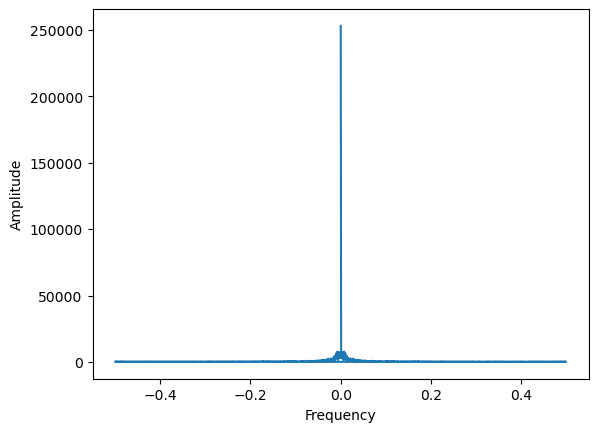

In [111]:
y = nature['CO2 (ppmv)']
y = np.ascontiguousarray(y)
yf = fft(y) 
xf = fftfreq(y.size)
plt.plot(xf, np.abs(yf)) 
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

In [112]:
test1=mlo['CO2 (ppmv)']
test2=noaa2['Temperature']
test3=methane_noaa['CH4_mean']
test4= yearly_rainfall
test5=irish_temp['Annual']

In [113]:
from scipy import signal
corr = signal.correlate(test1,test2,mode='same')

n = len(corr)
lags = np.linspace(-n/2, n/2, n)


max_lag = lags[np.argmax(corr)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


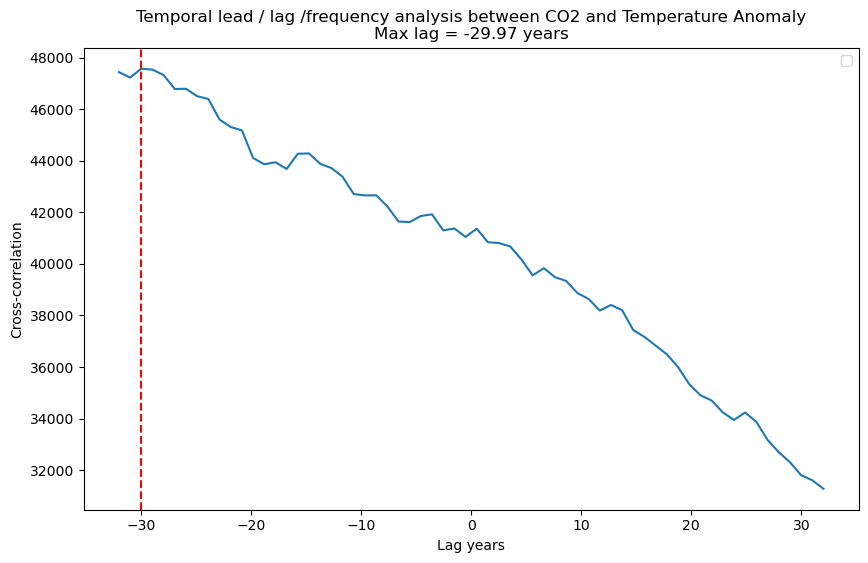

In [114]:
plt.figure(figsize=(10, 6))
plt.plot(lags, corr)
plt.axvline(max_lag, color='red', linestyle='--')
plt.xlabel('Lag years')
plt.ylabel('Cross-correlation')
plt.title(f'Temporal lead / lag /frequency analysis between CO2 and Temperature Anomaly\nMax lag = {max_lag:.2f} years')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


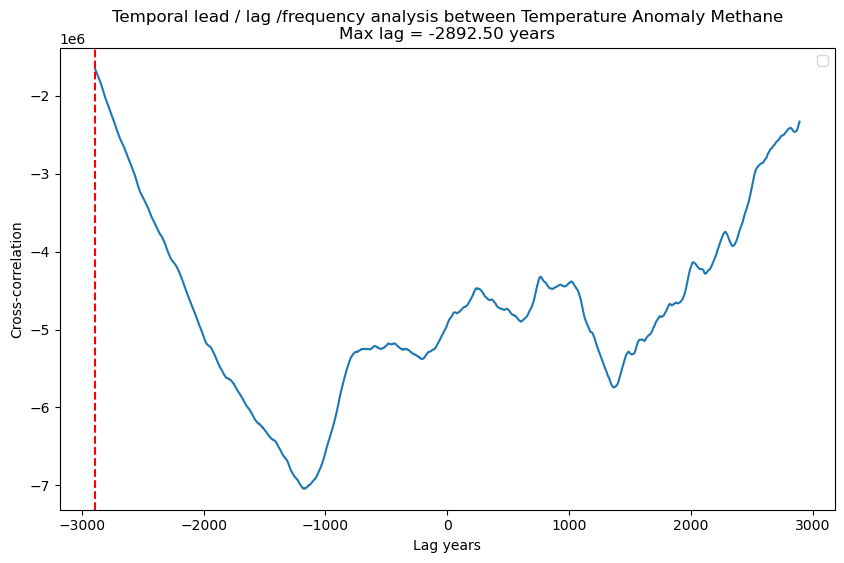

In [115]:
corr = signal.correlate(test2,test3,mode='same')

n = len(corr)
lags = np.linspace(-n/2, n/2, n)


max_lag = lags[np.argmax(corr)]
plt.figure(figsize=(10, 6))
plt.plot(lags, corr)
plt.axvline(max_lag, color='red', linestyle='--')
plt.xlabel('Lag years')
plt.ylabel('Cross-correlation')
plt.title(f'Temporal lead / lag /frequency analysis between Temperature Anomaly Methane\nMax lag = {max_lag:.2f} years')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


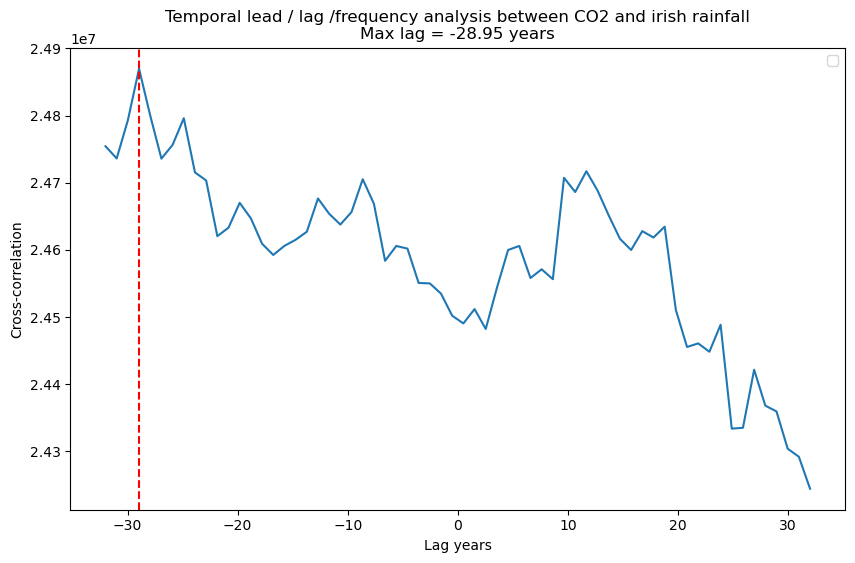

In [116]:
corr = signal.correlate(test1,test4,mode='same')

n = len(corr)
lags = np.linspace(-n/2, n/2, n)


max_lag = lags[np.argmax(corr)]
plt.figure(figsize=(10, 6))
plt.plot(lags, corr)
plt.axvline(max_lag, color='red', linestyle='--')
plt.xlabel('Lag years')
plt.ylabel('Cross-correlation')
plt.title(f'Temporal lead / lag /frequency analysis between CO2 and irish rainfall\nMax lag = {max_lag:.2f} years')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


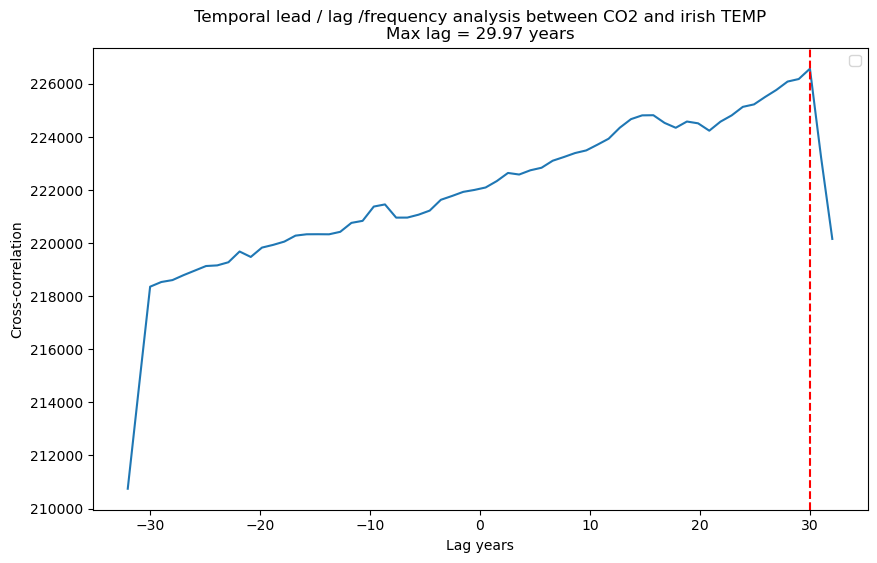

In [117]:
corr = signal.correlate(test1,test5,mode='same')

n = len(corr)
lags = np.linspace(-n/2, n/2, n)


max_lag = lags[np.argmax(corr)]
plt.figure(figsize=(10, 6))
plt.plot(lags, corr)
plt.axvline(max_lag, color='red', linestyle='--')
plt.xlabel('Lag years')
plt.ylabel('Cross-correlation')
plt.title(f'Temporal lead / lag /frequency analysis between CO2 and irish TEMP\nMax lag = {max_lag:.2f} years')
plt.legend()
plt.show()

In [118]:
from pathlib import Path
from warnings import simplefilter

In [119]:
test3

0       907
1       784
2       762
3       710
4       727
       ... 
2098    428
2099    418
2100    396
2101    458
2102    399
Name: CH4_mean, Length: 2103, dtype: int64

In [120]:
test6 = methane_noaa

In [121]:
jouzel2 =pd.read_csv('data/reducedjouzel.csv',encoding='Latin')

In [122]:
df2 = jouzel2.copy()

df2['tme'] = np.arange(len(jouzel2.index))

df2.tail()

,bag,ztop,EDC3bÃ©ta,AICC2012,deutfinal,temp,acc-EDC3beta,difference,celsius,datetime,datetimes,tme
16,17,8.80,73.05573,66.380000,-398.7,217.0,3.011312,-1.32,-56.15,-1876.94427,00:00.0,16
17,18,9.35,81.72349,75.710000,-395.9,217.4,2.994881,-0.92,-55.75,-1868.27651,00:00.0,17
18,19,9.90,90.43857,85.040000,-395.9,217.4,2.924870,-0.92,-55.75,-1859.56143,00:00.0,18
19,20,10.45,99.70485,94.863333,-399.3,216.9,2.678806,-1.42,-56.25,-1850.29515,00:00.0,19
20,21,11.00,109.81950,104.686667,-391.4,218.2,2.668117,-0.12,-54.95,-1840.18050,00:00.0,20


Text(0.5, 1.0, 'Prediction of Temperature Anomoly')

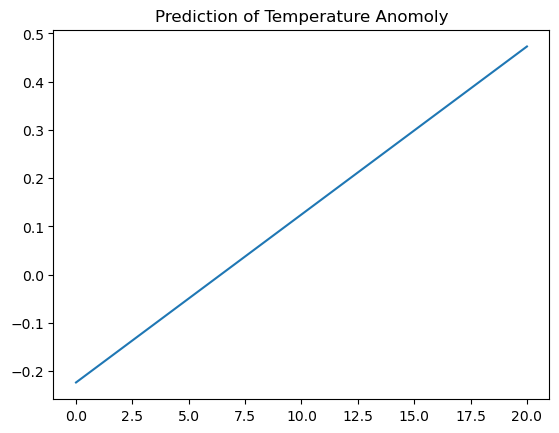

In [123]:
from pathlib import Path
from warnings import simplefilter


from sklearn.linear_model import LinearRegression

# Training data
X6 = df2.loc[:, ['tme']]  # features
y6 = df2.loc[:, 'difference']  # target

# Train the model
model = LinearRegression()
model.fit(X6, y6)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred6 = pd.Series(model.predict(X6), index=X6.index)
y_pred6 = y_pred6 * -1
 
ax = y_pred6.plot()
ax.set_title('Prediction of Temperature Anomoly')

In [124]:
future_years = pd.date_range(start='2020', end='2041', freq='Y')

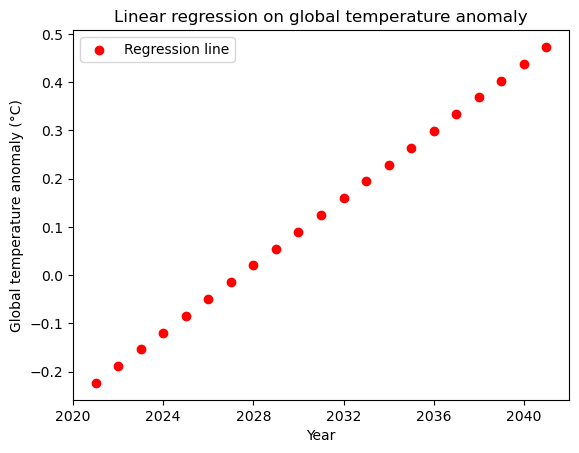

In [125]:
plt.scatter(future_years, y_pred6, color='red', label='Regression line')

plt.xlabel('Year')
plt.ylabel('Global temperature anomaly (°C)')
plt.title('Linear regression on global temperature anomaly')
plt.legend()
plt.show()

In [126]:
ta =pd.read_csv('data/ta.csv',encoding='Latin')
df3 = ta.copy()

df3['tme'] = np.arange(len(ta.index))
df3.columns = df3.columns.str.lstrip()
df3.columns = df3.columns.str.rstrip()

In [127]:
df3['ï»¿year'] = pd.to_datetime(df3['ï»¿year'], format='%Y')
X112 = df3.loc[:, ['tme']]  
y112 = df3.loc[:, 'anomaly']

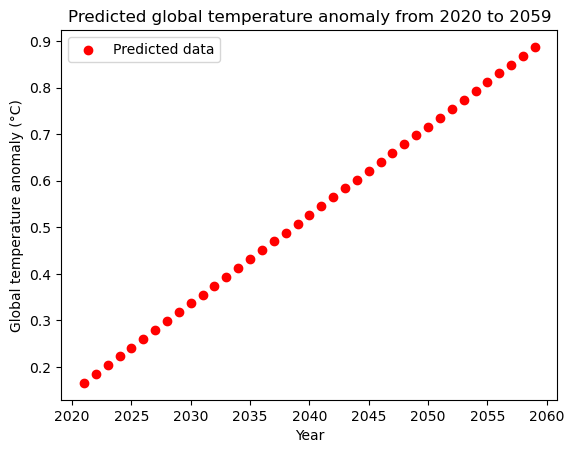

In [128]:
future_yearss = pd.date_range(start='2020', end='2059', freq='Y') 
model.fit(X112, y112) 
y_pred11 = model.predict(X112) 
plt.scatter( future_yearss,y_pred11, color='red', label='Predicted data')
plt.xlabel('Year')
plt.ylabel('Global temperature anomaly (°C)')
plt.title('Predicted global temperature anomaly from 2020 to 2059')
plt.legend()
plt.show()

In [129]:
mean_temp = pd.read_csv('data/Mean temp anomaly 1985-2023.csv')

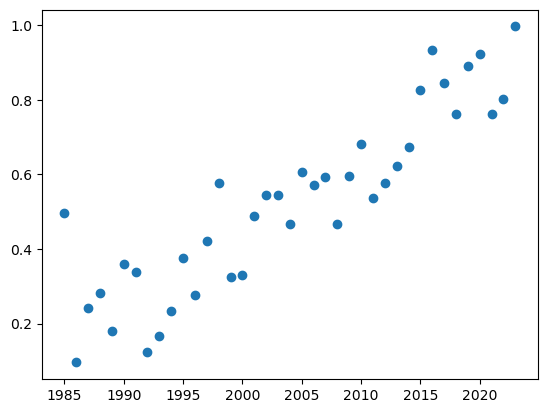

In [130]:
plt.scatter(mean_temp['year'],mean_temp['anomaly'], label = 'mean_temp_anomaly')

In [131]:
mean_temp = mean_temp.copy()
mean_temp['time'] = np.arange(len(mean_temp.index))
mean_temp

,year,anomaly,time
0,1985,0.497300,0
1,1986,0.095687,1
2,1987,0.243026,2
3,1988,0.282152,3
4,1989,0.179250,4
5,1990,0.360562,5
6,1991,0.338897,6
7,1992,0.124897,7
8,1993,0.165658,8
9,1994,0.233550,9


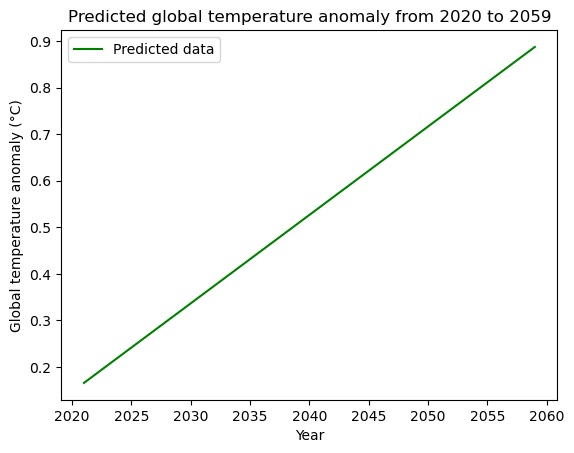

In [134]:
xt = mean_temp.loc[:, ['time']]  # features
yt = mean_temp.loc[:, 'anomaly']  # target

# Train the model
model = LinearRegression()
model.fit(xt, yt)

# Store the fitted values as a time series with the same time index as
# the training data
y_predt = pd.Series(model.predict(xt), index=xt.index)
future_years = pd.date_range(start='2020', end='2059', freq='Y') # Create a date range of future years
plt.plot( future_years,y_predt, color='green', label='Predicted data')
plt.xlabel('Year')
plt.ylabel('Global temperature anomaly (°C)')
plt.title('Predicted global temperature anomaly from 2020 to 2059')
plt.legend()
plt.show()